In [29]:

import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from anytree import RenderTree
from lib.tree_functions import import_tree_from_json
from lib.config import pipeline_name, db_name, tree_json_path
import tempfile
from lib import count_plot
import networkx as nx

base_url = "https://cdl-segg.fra1.cdn.digitaloceanspaces.com/cdl-segg/"

### Download Section Tree

In [30]:
tree_url = base_url + tree_json_path
response = requests.get(tree_url)
response.raise_for_status()
with tempfile.NamedTemporaryFile(delete=False, suffix=".json") as temp_file:
    temp_file.write(response.content)
    path = temp_file.name
    root_node = import_tree_from_json(path)

for pre, fill, node in RenderTree(root_node):
    print(f"{pre}{node.name} ({node.data_id})")

Pimp my School Downloads (36)
├── 1.1. Was ist Schülervertretungsarbeit (38)
├── 1.2. Rechtliche Grundlagen (39)
│   ├── Mecklenburg-Vorpommern (41)
│   ├── Besonderheiten an einzelnen Schulformen (42)
│   │   ├── Oberstufenzentren (OSZ) (159)
│   │   └── Grundschulen (173)
│   ├── Nordrhein-Westfalen (52)
│   │   └── Erlasse (55)
│   ├── Sachsen-Anhalt (53)
│   ├── Berlin (56)
│   │   ├── Besonderheiten Berufsschulen (57)
│   │   ├── Formales für Gremien (58)
│   │   └── Schülervertretung in Bezirk und Land (59)
│   ├── Hessen (132)
│   └── Brandenburg (153)
├── 1.3. Mögliche Aktionen, Themen und Projekte von A-Z (46)
│   ├── Unterricht verändern (47)
│   ├── Projektideensammlungen zur Inspiration (111)
│   ├── Aktionen und Projekte (Beschreibungen) (51)
│   │   ├── Lesenacht (105)
│   │   ├── Party (106)
│   │   ├── Schulball (107)
│   │   ├── Schülernachhilfe-Pool (108)
│   │   ├── Valentinstag (109)
│   │   ├── Schülerfirma (160)
│   │   └── Veranstaltungen (110)
│   └── Klima

### Download Files

In [31]:
posts_url = base_url + "downloads.parquet"
response = requests.get(posts_url)
response.raise_for_status()
df = pl.read_parquet(response.content)
df.head()

data_id,data_category_id,title,category_title,download_link,file_type
i64,i64,str,str,str,str
6747,136,"""Große Spielesammlung""","""Kennenlernen / Teambuilding""","""https://meinsvwissen.de/downlo…","""pdf"""
4075,98,"""Ablaufplan der Klassensprecher…","""Planung""","""https://meinsvwissen.de/downlo…","""octet-stream"""
3996,66,"""Vorlage Zertifikat 3""","""2.4. Merkmale sv-freundlicher …","""https://meinsvwissen.de/downlo…","""pdf"""
3984,65,"""Pimp my school. Möglichkeiten…","""2.3. Motivieren, einladen, ein…","""https://meinsvwissen.de/downlo…","""pdf"""
3931,88,"""Methode-Wirklich geeignete KSP…","""2.1.1. Klassensprecher_innen""","""https://meinsvwissen.de/downlo…","""pdf"""


In [32]:
df["file_type"].value_counts().sort("count", descending=True)

file_type,count
str,u32
"""pdf""",410
"""octet-stream""",113
"""png""",35
"""mp4""",18
"""jpeg""",18


### Posts

In [33]:
posts_url = base_url + "posts.parquet"
response = requests.get(posts_url)
response.raise_for_status()
df = pl.read_parquet(response.content)
df.head()

id,date,title,stage,tool_types,topics,download_chapter_dedicated,download_chapters_further,book_chapter,related_posts
i64,date,str,str,list[cat],list[str],i64,list[i64],str,list[i64]
5957,2022-06-08,"""Rechte Sachsen-Anhalt""","""grundlagen""","[""praesentation""]","[""rechte""]",53,[],null,"[6588, 3421, … 6954]"
5211,2022-03-30,"""Aufgaben von Schülersprecherte…","""grundlagen""","[""infografik""]","[""sv-team"", ""wahlen""]",68,[],"""https://meinsvwissen.de/wp-con…","[3421, 7401, … 4593]"
8395,2025-07-23,"""Rechte-Quiz Berlin""","""grundlagen""","[""praesentation""]","[""rechte-berlin""]",56,[],null,"[3421, 6588, … 3297]"
4959,2022-03-21,"""Zeitfenster""","""grundlagen""","[""infografik""]","[""sitzungen"", ""zeitmanagement""]",null,[60],"""https://meinsvwissen.de/wp-con…","[4863, 8799]"
8314,2025-07-22,"""Rechte-Quiz Brandenburg""","""grundlagen""","[""praesentation""]","[""rechte-brandenburg""]",153,[],null,"[3421, 6588, … 5752]"


In [34]:
len(df)

89

In [35]:
df["stage"].value_counts().sort("count", descending=True)

stage,count
str,u32
"""sv-alltag""",31
"""grundlagen""",30
"""fortgeschrittene""",14
"""profis""",9
null,5


In [36]:
df["stage"].unique().to_list()

['profis', 'fortgeschrittene', None, 'grundlagen', 'sv-alltag']

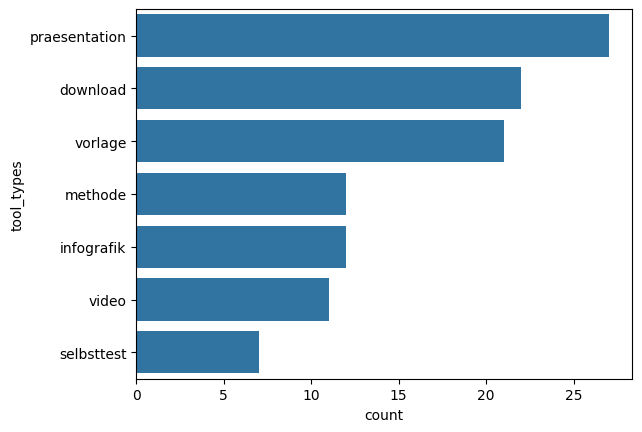

In [37]:
count_plot(df, "tool_types")

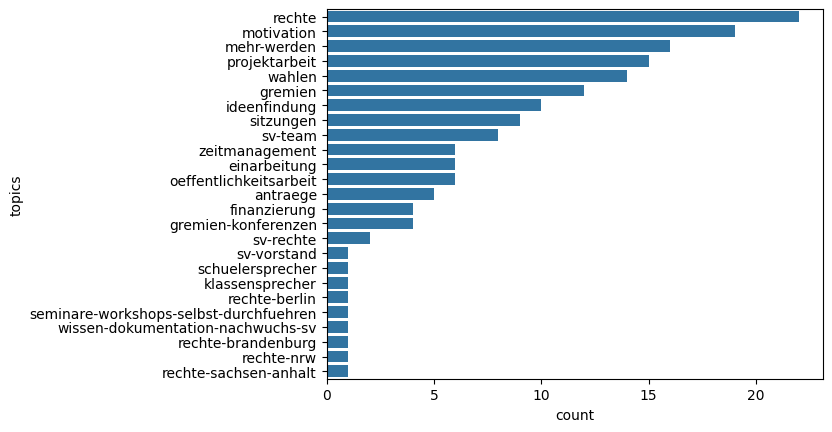

In [38]:
count_plot(df, "topics")

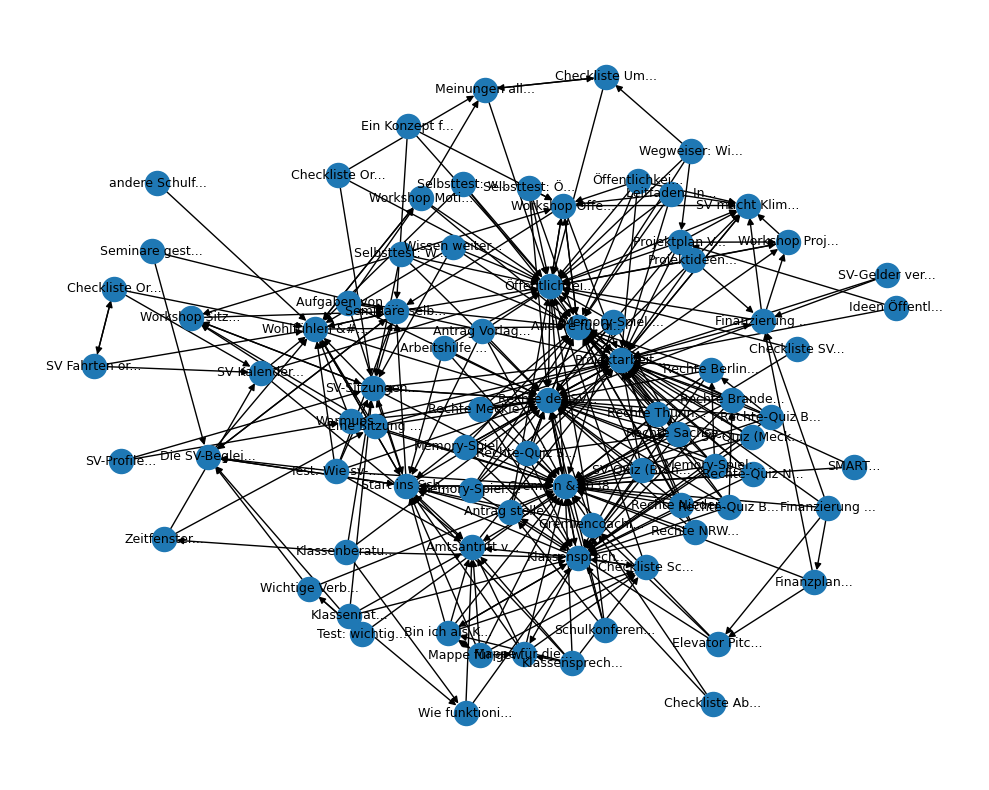

In [43]:
records = df.to_dicts()

G = nx.DiGraph()
for rec in records:
    src = rec["id"]
    G.add_node(src, label=f"{rec['title'][:13]}...")
    for tgt in rec.get("related_posts") or []:
        G.add_edge(src, tgt)

nodes_to_remove = [n for n, d in G.degree() if d <= 1]
G.remove_nodes_from(nodes_to_remove)

pos = nx.nx_agraph.graphviz_layout(G, prog="neato")

plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(
    G,
    pos,
)
nx.draw_networkx_edges(
    G,
    pos,
)
labels = nx.get_node_attributes(G, "label")
nx.draw_networkx_labels(G, pos, labels, font_size=9, font_family="sans-serif")

plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
self_loop_nodes = [n for n in G.nodes() if G.has_edge(n, n)]

# 2. Or via self-loop edges
self_loop_nodes = list({u for u, v in nx.selfloop_edges(G)})

print("Node IDs with self-loops:", self_loop_nodes)


Node IDs with self-loops: []


### Sections

In [ ]:
posts_url = base_url + "sections.parquet"
response = requests.get(posts_url)
response.raise_for_status()
df = pl.read_parquet(response.content)
df.head()

post_id,title,text,type,external_link,transcript_url
i64,str,str,cat,str,str
5957,null,"""Es ist wichtig, die Mitbestimm…","""plain_text""",null,null
5957,"""Präsentation: Alle SV-Rechte i…","""Eure Rechte als SV sind durch …","""accordion_section_text""",null,null
5957,"""Präsentation: Alle SV-Rechte i…","""Klickt euch durch die Präsenta…","""accordion_section_text""",null,null
5957,"""Präsentation: Alle SV-Rechte i…",null,"""accordion_section_prezi""","""https://prezi.com/view/1kicA6d…",null
5957,"""Schaubild: Gremien und Konfere…","""Hier seht ihr eine Übersicht ü…","""accordion_section_text""",null,null


In [ ]:
df["type"].value_counts().sort("count", descending=True)

type,count
cat,u32
"""accordion_section_text""",189
"""plain_text""",95
"""accordion_section_image""",91
"""flipcard""",60
"""accordion_section_prezi""",35
…,…
"""h5p""",26
"""image""",19
"""youtube""",10


### Glossary Terms

In [ ]:
posts_url = base_url + "glossary_terms.parquet"
response = requests.get(posts_url)
response.raise_for_status()
df = pl.read_parquet(response.content)
df.head()

term,definition,DE,DE_BW,DE_BY,DE_BE,DE_BB,DE_HB,DE_HH,DE_HE,DE_MV,DE_NI,DE_NW,DE_RP,DE_SL,DE_SN,DE_ST,DE_SH,DE_TH
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""Antrag""","""Ein Antrag ist ein Vorschlag, …",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""Aufgabenprofil""","""Ihr schreibt transparent und k…",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""Auftaktveranstaltung / SV-Tag""","""Start in die SV-Arbeit zu Begi…",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""Bezirks-/ Kreis & Landesschüle…",null,"""BSK (Bundesschülerkonferenz – …",null,null,"""BSA und LSA (Bezirksschüler- u…","""KSR und LSR (Kreisschüler- und…",null,null,null,"""KSR und LSR (Kreisschüler- und…",null,"""BSV und LSV (Bezirksschüler- u…",null,null,null,"""KSR und LSR (Kreisschüler- und…",null,"""Kreisschülersprecher:innen und…"
"""BSK""","""Bundesschülerkonferenz. Sie be…","""Bundesschülerkonferenz. Sie be…",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


### Publications

In [44]:
posts_url = base_url + "publications.parquet"
response = requests.get(posts_url)
response.raise_for_status()
df = pl.read_parquet(response.content)
df.head()

key,type,title,authors,tags,abstract,date,url
str,str,str,list[str],list[str],str,str,str
"""21001957/HMDK4ST7""","""article-journal""","""Eigenverantwortlich lernen in …","[""Matthias Busch""]",null,"""Das Lernen in Projekten bietet…","""2019""","""https://ubt.opus.hbz-nrw.de/fr…"
"""21001957/7LPRH465""","""article-journal""","""Schulische Konflikte als demok…","[""Matthias Busch""]",null,"""Konflikte sind unvermeidlich. …","""2023""","""https://ubt.opus.hbz-nrw.de/fr…"
"""21001957/2TLKVKIE""","""article-journal""","""Schülervertretung: Gelingensbe…","[""Charlotte Keuler""]",null,null,"""2020""","""https://ubt.opus.hbz-nrw.de/fr…"
"""21001957/G4PWMAF5""","""article-journal""","""Potentialanalyse „Demokratisch…","[""Matthias Busch""]",null,null,"""2018""","""https://ubt.opus.hbz-nrw.de/fr…"
"""21001957/A2BEK4QA""","""article-journal""","""Anleitung zur partizipativen P…","[""Matthias Busch""]",null,"""Damit Demokratietage ihre demo…","""2021""","""https://ubt.opus.hbz-nrw.de/fr…"


In [46]:
df["type"].value_counts().sort("count", descending=True)

type,count
str,u32
"""article-journal""",15
"""book""",7
"""article""",7
"""chapter""",1
